# Lending Club Case Study

### 1. Data Loading

#### Import required libraries and load the dataset

#### Installing relevant versions of the required libraries since some functionalities are absent in older versions

In [1]:
!pip install pandas==2.1.4
!pip install matplotlib==3.8.0
!pip install seaborn==0.13.2

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset into the pandas dataframe
loan_df = pd.read_csv('loan.csv', low_memory = False)

In [4]:
#to view all the columns and rows in the dataframe with a scrollbar
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 2. Data Sanity Checks

#### Checking basic information of the dataframe

In [5]:
#checking the number of rows and columns in the dataframe
loan_df.shape

(39717, 111)

In [6]:
#displaying the first 5 rows in the dataframe
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
#checking the information on the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### 3. Problem Statement and Data Analysis

#### Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
 - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
 - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

#### Problem Statement Analysis
When we receive a loan application, we need to make a decision whether the consumer is likely to repay the loan.
Based on the problem statement and data analysis, this implies the following:
 - Our analysis is around the consumer loan data where they have successfully fully paid the loan, and the ones which have defaulted on the loan. The consumers who are still in the __*active loan status*__ within the agreed repayment period will be not suitable candidates for analysis and must be filtered out from the dataset.
 - The decision of whether to approve the loan has to be made based on the application inputs provided by the consumer and certain background verifications done by the company. Hence, the __*variables which indicate information post the approval of the loan*__ will not be useful for our analysis since by then decision of providing the loan is already taken.
 - Certain variables are __*extra fields*__ which do not provide any insights about the data and can be filtered out from the dataset.
 - __*Constant valued*__ variables can also be dropped from the dataset since they will not be useful in deriving insights.
 - __*Masked*__ variables can also be dropped since we will not be able to extract meaningful information from them.

#### Filtering the dataset as per the Problem Statement and Data Analysis

##### Filtering the dataset to exclude the **Current** loan status

In [8]:
#retrieving unique values of loan_status
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [9]:
#drop the entries for consumer data with "Current" loan_status
loan_df = loan_df.drop(loan_df[loan_df['loan_status'] == 'Current'].index)

##### Filtering the dataset to drop the post loan approval based variables

In [10]:
#dropping the columns applicable post the approval of the loan since they will be irrelevant to the analysis
post_approval_cols = ['chargeoff_within_12_mths','collection_recovery_fee','collections_12_mths_ex_med','funded_amnt','funded_amnt_inv','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','next_pymnt_d','out_prncp','out_prncp_inv','recoveries','revol_bal','revol_util','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp']
loan_df = loan_df.drop(post_approval_cols, axis = 1)

##### Filtering the dataset to drop the extra columns not useful for analysis

In [11]:
#dropping extra columns which will not be useful for analysis
extra_cols = ['id','member_id','emp_title','url','desc','title']
loan_df = loan_df.drop(extra_cols, axis = 1)

##### Filtering the dataset to drop the masked variables

In [12]:
#removing zip_code since it is masked column
loan_df = loan_df.drop(['zip_code'],axis=1)

#####  Filtering the dataset to drop the constant valued variables

In [13]:
#dropping the single-valued variables
loan_df = loan_df.loc[:,loan_df.nunique()>1]

In [14]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,9,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,4,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,10,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,37,0.0
5,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,12,0.0


### 4. Handling Missing Values

#### Missing Values
To handle missing values:
1. **Scenario**: Columns which contain NA only.  
   **Action**: Drop the columns.
2. **Scenario**: Columns which have acceptable range of mising values.  
   **Action**: Impute the values.
    - For numerical columns: Use the median to impute the values.  
      (Reason: Median is a better representative of a distribution than Mean.)  
    - For categorical columns: Use the mode to impute the values.
3. **Scenario**: Columns which have high percentage of missing values.  
   **Action**: Drop the columns since imputation might lead to biased analysis

In [15]:
#dropping columns with NA only
loan_df = loan_df.dropna(axis = 1, how = 'all')
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,9,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,4,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,10,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,37,0.0
5,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,12,0.0


In [16]:
#checking the average of mean values across all columns
loan_df.isnull().mean()

loan_amnt                 0.000000
term                      0.000000
int_rate                  0.000000
installment               0.000000
grade                     0.000000
sub_grade                 0.000000
emp_length                0.026778
home_ownership            0.000000
annual_inc                0.000000
verification_status       0.000000
issue_d                   0.000000
loan_status               0.000000
purpose                   0.000000
addr_state                0.000000
dti                       0.000000
delinq_2yrs               0.000000
earliest_cr_line          0.000000
inq_last_6mths            0.000000
mths_since_last_delinq    0.645592
mths_since_last_record    0.928973
open_acc                  0.000000
pub_rec                   0.000000
total_acc                 0.000000
pub_rec_bankruptcies      0.018068
dtype: float64

In [17]:
#checking the datatype of all variables
loan_df.dtypes

loan_amnt                   int64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
mths_since_last_record    float64
open_acc                    int64
pub_rec                     int64
total_acc                   int64
pub_rec_bankruptcies      float64
dtype: object

#### Dropping the variables which have higher percentage of missing values

In [18]:
#since mths_since_last_delinq and mths_since_last_record have high proportion of missing values, we can discard these columns since it will not provide meaningful insights
loan_df = loan_df.drop(['mths_since_last_delinq', 'mths_since_last_record'], axis = 1)

#### Imputing the values for variables having acceptable percentage of missing values

In [19]:
#since emp_length is a categorical variable using mode
loan_df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [20]:
#imputing the value for emp_length with mode
loan_df['emp_length'] = loan_df['emp_length'].fillna(loan_df['emp_length'].mode())

In [21]:
#since pub_rec_bankruptcies is a numerical variable using median
loan_df['pub_rec_bankruptcies'].describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [22]:
#imputing the value for pub_rec_bankruptcies with median
loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].fillna(loan_df['pub_rec_bankruptcies'].median())

In [23]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,9,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,4,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,10,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,37,0.0
5,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,12,0.0


### 5. Segmentation

#### Tranformation of variables into appropriate data types
 - **int_rate**: Convert the interest rate from an object type into a floating point value as a continuous variable.
 - **annual_inc**: Round the annual_inc to the nearest integer value.
 - **pub_rec_bankruptcies**: Convert pub_rec_bankruptcies to an integer value.
#### Creation Derived metrics
 - **issue_month**: Month part of issue_d
 - **issue_year**: Year part of issue_d
 - **sub_grade_value**: Since grade is already accounted for in the variable "grade", extracting the sub_grade value from the sub_grade variable
 - **earliest_cr_line_month**: Month part of earliest_cr_line
 - **earliest_cr_line_year**: Year part of earliest_cr_line
#### Categorization into categorical and numerical variables
Categorizing the variables after transformation and creation of derived metrics as categorical and numerical against the evauation variable loan_status

In [24]:
#transformation of variables into appropriate form and datatypes
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: x.rstrip('%')).astype('float')

loan_df['annual_inc'] = loan_df['annual_inc'].round(0).astype('int')

loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].astype('int')

In [25]:
#creating derived metrics
loan_df['issue_d_month'] = pd.to_datetime(loan_df['issue_d'], format = '%b-%y').dt.month
loan_df['issue_d_year'] = pd.to_datetime(loan_df['issue_d'], format = '%b-%y').dt.year

loan_df['sub_grade'] = loan_df['sub_grade'].apply(lambda x: x[-1]).astype('int')

loan_df['earliest_cr_line_month'] = pd.to_datetime(loan_df['earliest_cr_line'], format = '%b-%y').dt.month
loan_df['earliest_cr_line_year'] = pd.to_datetime(loan_df['earliest_cr_line'], format = '%b-%y').dt.year

In [26]:
#dropping the source of derived metrics since we won't be using them for anaylsis
loan_df = loan_df.drop(['issue_d','earliest_cr_line'], axis = 1)

#### Segmentation into numerical, categorical and evaluation variables

In [27]:
#segmenting the variables into 3 categories - numerical, categorical and evaluation variable
numerical_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'delinq_2yrs', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year']
categorical_vars = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state']
evaluation_var = 'loan_status'

In [28]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,5000,36 months,10.65,162.87,B,2,10+ years,RENT,24000,Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,9,0,12,2011,1,1985
1,2500,60 months,15.27,59.83,C,4,< 1 year,RENT,30000,Source Verified,Charged Off,car,GA,1.00,0,5,3,0,4,0,12,2011,4,1999
2,2400,36 months,15.96,84.33,C,5,10+ years,RENT,12252,Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,10,0,12,2011,11,2001
3,10000,36 months,13.49,339.31,C,1,10+ years,RENT,49200,Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,37,0,12,2011,2,1996
5,5000,36 months,7.90,156.46,A,4,3 years,RENT,36000,Source Verified,Fully Paid,wedding,AZ,11.20,0,3,9,0,12,0,12,2011,11,2004


### 6. Analysis

### Univariate Analysis

#### Univariate analysis on numerical variables

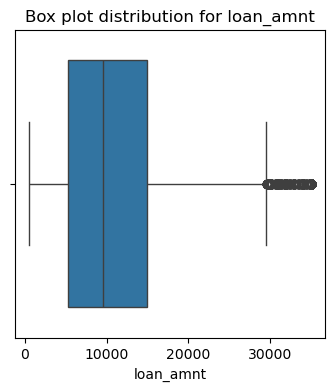

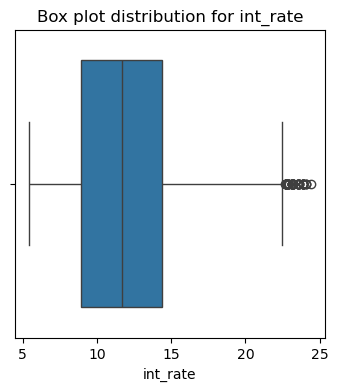

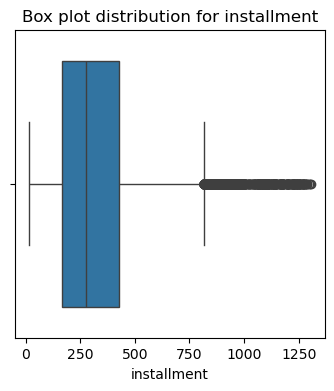

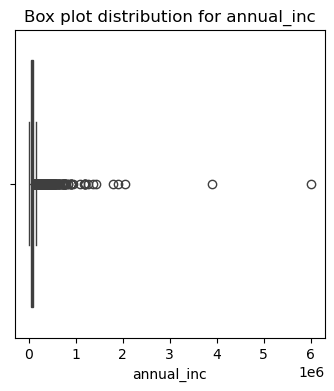

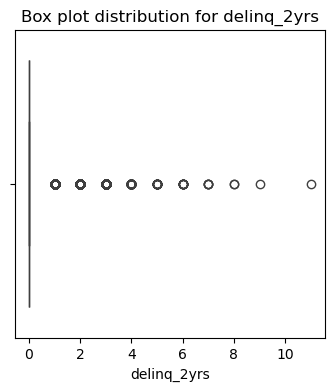

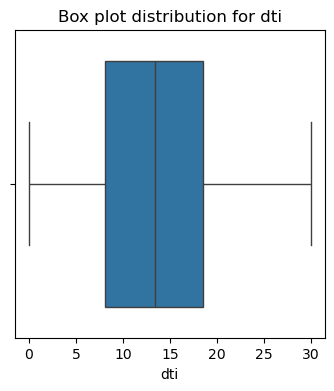

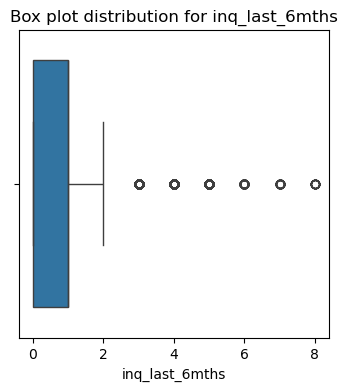

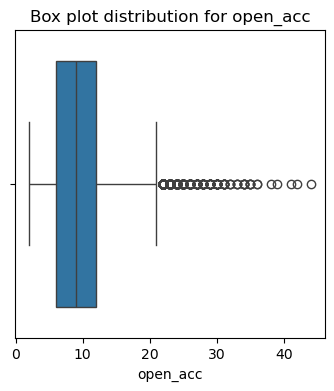

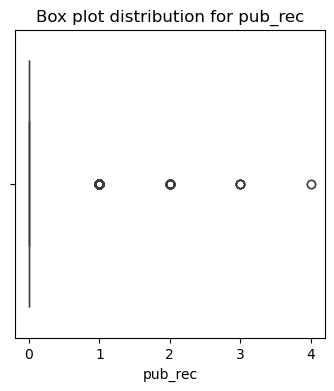

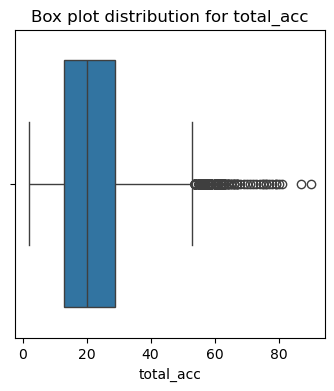

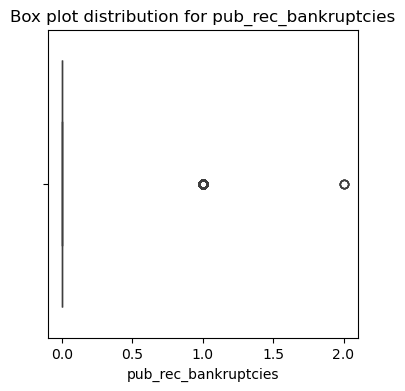

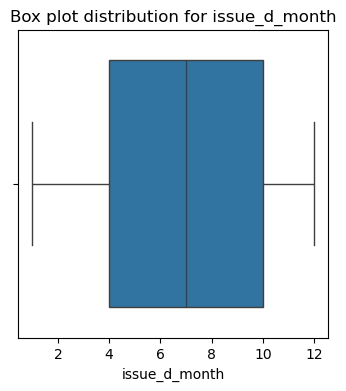

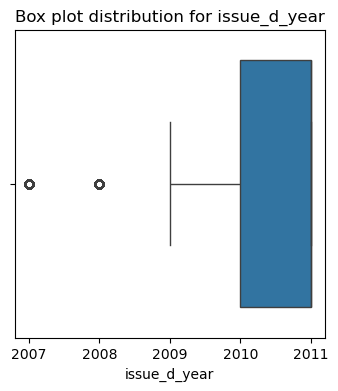

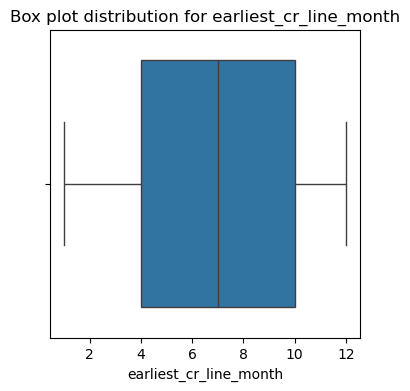

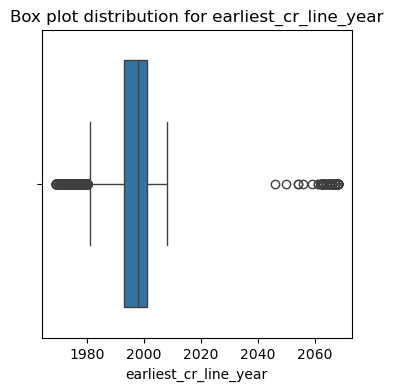

In [29]:
#creating box plot for all numerical variables
for var in numerical_vars:
    plt.figure(figsize = (4,4))
    sns.boxplot(x = var, data = loan_df)
    plt.title(f"Box plot distribution for {var}")
    plt.show()

#### Analyzing some variables from the above plots separately since the information is not quite evident above

##### Analyzing annual_inc variable on **log scale** and **handling outliers**

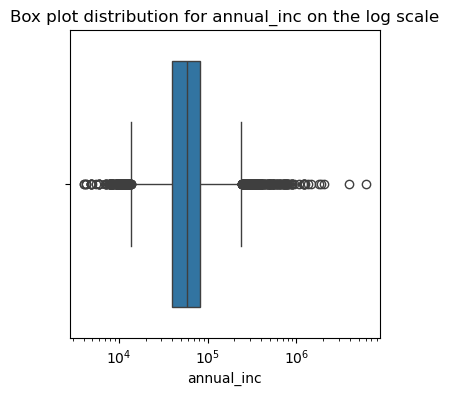

In [30]:
#analyzing annual_inc on log scale since it is difficult to analyze on the normal scale because of higher value range
plt.figure(figsize = (4,4))
sns.boxplot(x = 'annual_inc', data = loan_df, log_scale = True)
plt.title(f"Box plot distribution for annual_inc on the log scale")
plt.show()

In [31]:
#checking the different quantile values for annual_inc
annual_inc_quantiles = loan_df['annual_inc'].quantile([0,0.25,0.50,0.75,0.90,0.95,0.99])
annual_inc_quantiles

0.00      4000.0
0.25     40000.0
0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [32]:
#Removing outliers based on annual income after the 99th quantile due to high increase in value for small range variation
annual_inc_quantile_99th = loan_df['annual_inc'].quantile(0.99)
loan_df = loan_df[loan_df['annual_inc']<=annual_inc_quantile_99th]

##### Analyzing the variable delinq_2yrs

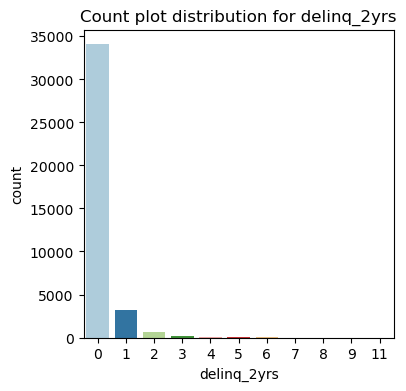

In [33]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'delinq_2yrs', data = loan_df, palette = 'Paired')
plt.title(f"Count plot distribution for delinq_2yrs")
plt.show()

##### Analyzing pub_rec and pub_rec_bankruptcies variables

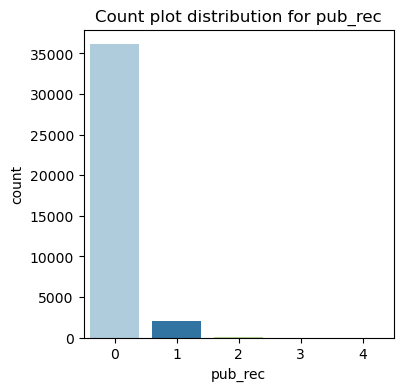

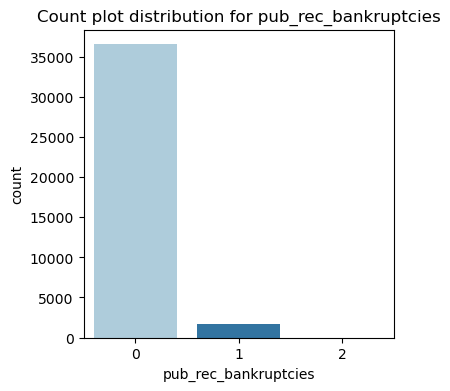

In [34]:
#Analyzing pub_rec and pub_rec_bankruptcies
pub_rec_var = ['pub_rec','pub_rec_bankruptcies']
for var in pub_rec_var:
    plt.figure(figsize = (4,4))
    sns.countplot(x = var, data = loan_df, palette = 'Paired')
    plt.title(f"Count plot distribution for {var}")
    plt.show()

#### Since pub_rec have similar nature and are related in some terms we can pick one of them which is more relevant for our analysis

1. Based on the **Data Dictionary**, the definitions for the two variables are mentioned below:
 - pub_rec: Number of derogatory public records  
 - pub_rec_bankruptcies: Number of public record bankruptcies

2. Based on our own **research on risk analytics**, we know all public record bankruptcies are derogatory public records, but not all derogatory public records are bankruptcies. The key difference lies in the scope: _"derogatory public records"_ is a broader category that includes bankruptcies among other types of records, whereas _"public record bankruptcies"_ refers exclusively to bankruptcy filings.

Hence, we can **use pub_rec_bankruptcies** for our analysis and **drop pub_rec**.

In [35]:
#dropping the pub_rec column while retaining the variable pub_rec_bankruptcies since the latter is more relevant for our analysis and both provide related information and have similar behviour
loan_df = loan_df.drop(['pub_rec'], axis = 1)
numerical_vars.remove('pub_rec')

#### Univariate analysis on categorical variables

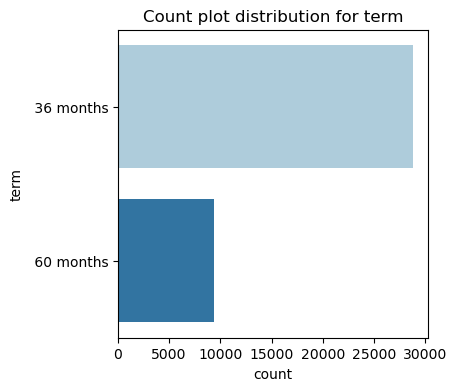

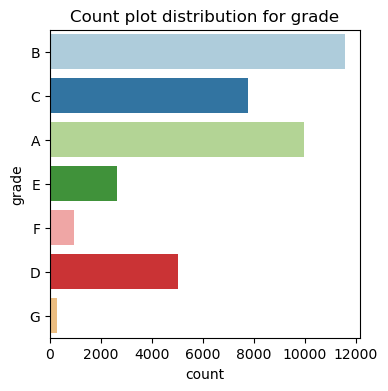

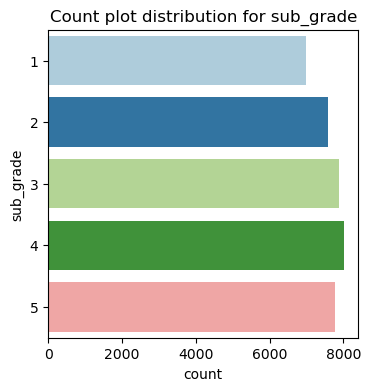

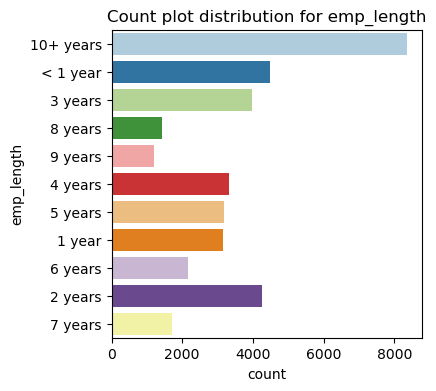

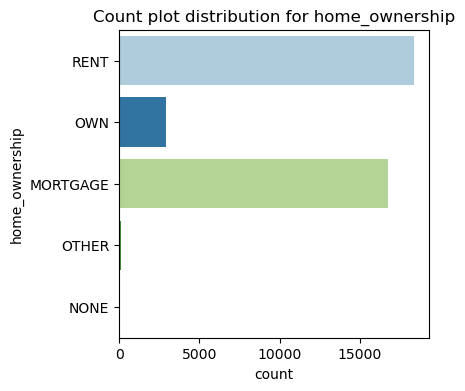

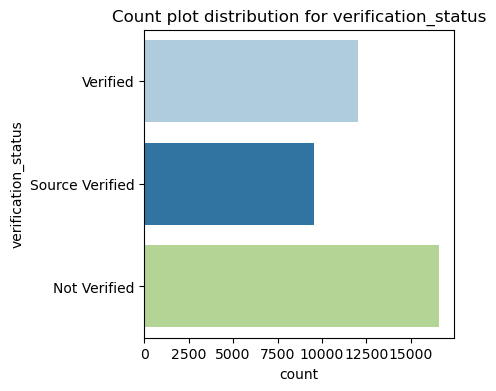

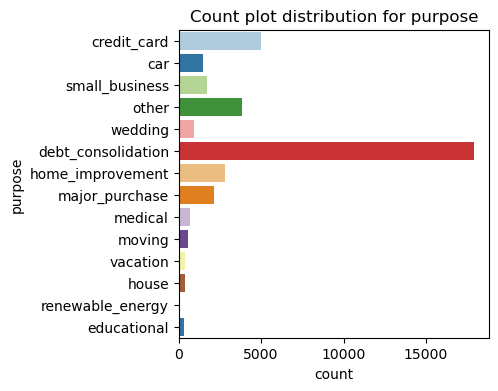

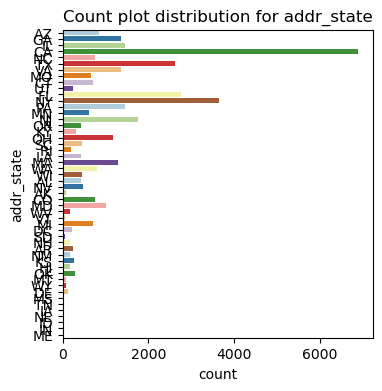

In [36]:
#creating box plot for all categorical variables
for var in categorical_vars:
    plt.figure(figsize = (4,4))
    sns.countplot(y = var, data = loan_df, palette = 'Paired')
    plt.title(f"Count plot distribution for {var}")
    plt.show()

#### Analyzing the variable "addr_state" from the above plots separately since the information is not quite evident above

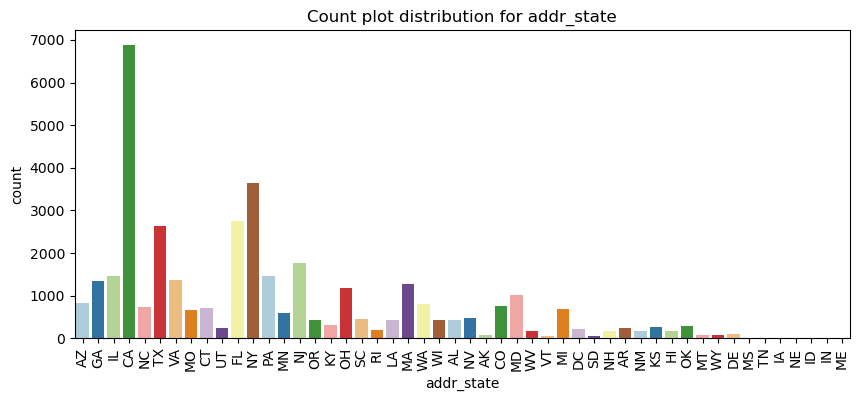

In [37]:
#Analyzing addr_state
plt.figure(figsize = (10,4))
plt.xticks(rotation = 90)
sns.countplot(x = 'addr_state', data = loan_df, palette = 'Paired')
plt.title(f"Count plot distribution for addr_state")
plt.show()

### Bivariate Analysis

### Creating generic functions to be utilised for bivariate analysis

In [38]:
def generate_bar_plot_distribution_for_loan_status(df, feature_variable):
    """generates bar plot distribution for 'Fully Paid' and 'Charged Off' consumers based on the provided feature_variable for the dataframe
    
    Parameters:
    df: DataFrame
    feature_variable: string
    
    Returns:
    bar_dist_df: DataFrame
    """
    #calculating the percentage distribution for feature_variable of Fully Paid consumers
    var_FP_series = df.loc[df[evaluation_var] == 'Fully Paid', feature_variable].value_counts(normalize = True)*100
    var_FP_df = var_FP_series.reset_index()
    var_FP_df.columns = [feature_variable, 'Fully Paid']

    #calculating the percentage distribution for feature_variable of Charged Off consumers
    var_CO_series = df.loc[df[evaluation_var] == 'Charged Off', feature_variable].value_counts(normalize = True)*100
    var_CO_df = var_CO_series.reset_index()
    var_CO_df.columns = [feature_variable, 'Charged Off']

    #merging the two dataframes for the combined analysis
    bar_dist_df = var_FP_df.merge(var_CO_df, on = feature_variable, how = 'outer')
    bar_dist_df = bar_dist_df.melt(id_vars = feature_variable, value_vars = ['Fully Paid', 'Charged Off'])

    #filling the values present in either loan_status category with 0 percentage
    bar_dist_df['value'].fillna(0, inplace=True)
    return bar_dist_df

### Analyzing the imapct of the numerical variables on loan_status

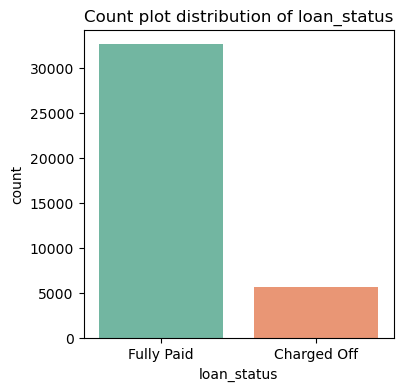

In [39]:
#overall distribution of loan_status in the dataset
plt.figure(figsize = (4,4))
sns.countplot(x = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Count plot distribution of loan_status")
plt.show()

#### Analysis of loan_amnt on loan_status

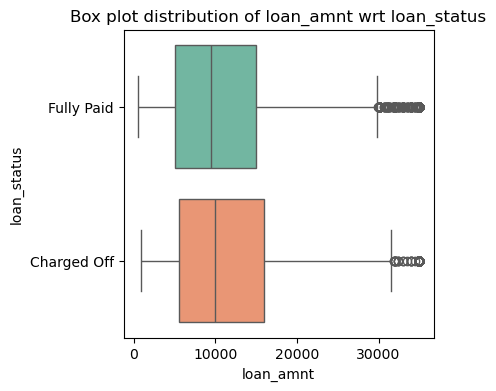

In [40]:
plt.figure(figsize = (4,4))
sns.boxplot(x = 'loan_amnt', y = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Box plot distribution of loan_amnt wrt loan_status")
plt.show()

##### Impact of loan_amnt
 - Median value is almost same for both 'Fully Paid' and 'Charged Off' loan statuses.
 - The 25th and 75 the percentile is higher for 'Charged Off' cases in comparison to 'Fully Paid' ones.
 - Also, the interquartile range for 'Charged Off' case is higher than that of 'Fully Paid' ones.
 - Hence, we can conclude that, **higher loan_amnt indicates slightly higher chances of defaulting**.

#### Analysis of int_rate on loan_status

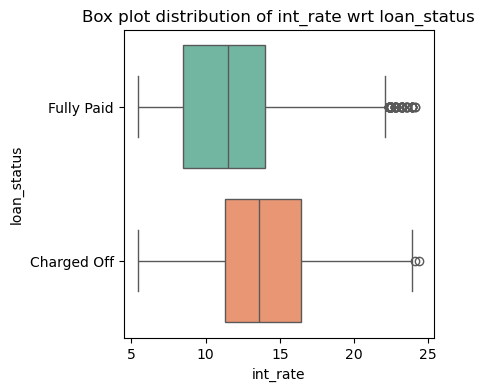

In [41]:
plt.figure(figsize = (4,4))
sns.boxplot(x = 'int_rate', y = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Box plot distribution of int_rate wrt loan_status")
plt.show()

##### Impact of int_rate
The 25th, 50th (median) and 75th quantiles for Charged Off loan status are higher than Fully Paid scenarios.  
Hence, we can conclude that **higher int_rate indicates higher chances of defaulting**.

#### Analysis of installment on loan_status

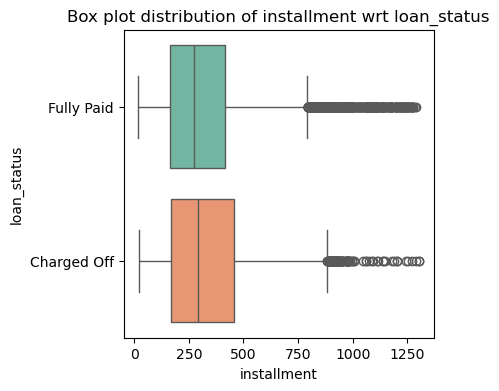

In [42]:
plt.figure(figsize = (4,4))
sns.boxplot(x = 'installment', y = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Box plot distribution of installment wrt loan_status")
plt.show()

##### Impact of installment
 - The interquartile range and median for both cases is roughly same whether or not the consumer has defaulted on the loan.
 - There are many outliers in both the cases whether or not the consumer has defaulted on the loan.

Hence, we can conclude that, **installment does not have much impact on the possibility of defaulting consumers**.

#### Analysis of annual_inc on loan_status

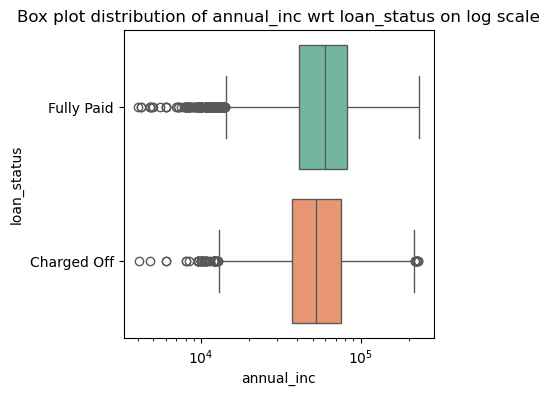

In [43]:
plt.figure(figsize = (4,4))
sns.boxplot(x = 'annual_inc', y = evaluation_var, data = loan_df, log_scale = True, palette = 'Set2')
plt.title(f"Box plot distribution of annual_inc wrt loan_status on log scale")
plt.show()

##### Impact of annual_inc
 - The 25th percentile, median, 75th percentile all are lower for the case of consumers who are defaulters wrt the ones who have Fully Paid the loan amount.  
 - There are few outliers in the case of Charged Off wrt the maximum annual_inc.  
 - The general trend implies, the lower the annual_inc, higher the chances of the consumer being a defaulter.  
 - Since the analysis is done on a log scale, it amplifies the magnitude of impact of annual_inc being inversely proportional to the consumer being a defaulter.

Hence, we can conclude that, **lower annual_inc indicates higher chances of defaulting**.

#### Analysis of delinq_2yrs on loan_status

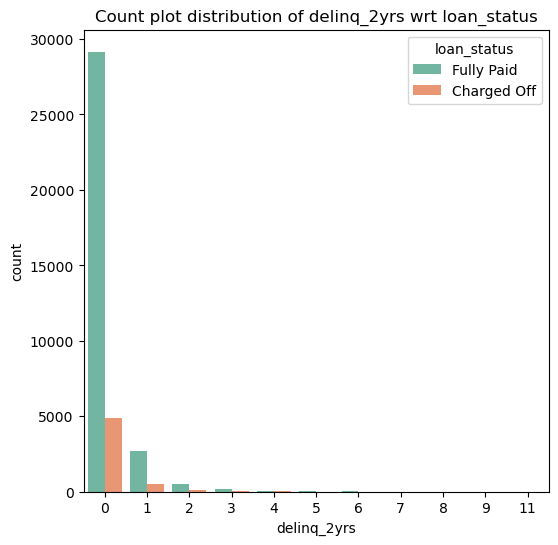

In [44]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'delinq_2yrs', hue = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Count plot distribution of delinq_2yrs wrt loan_status")
plt.show()

In [45]:
#generating the bar plot percentage distribution for delinq_2yrs
delinq_2yrs_df = generate_bar_plot_distribution_for_loan_status(loan_df, feature_variable = 'delinq_2yrs')

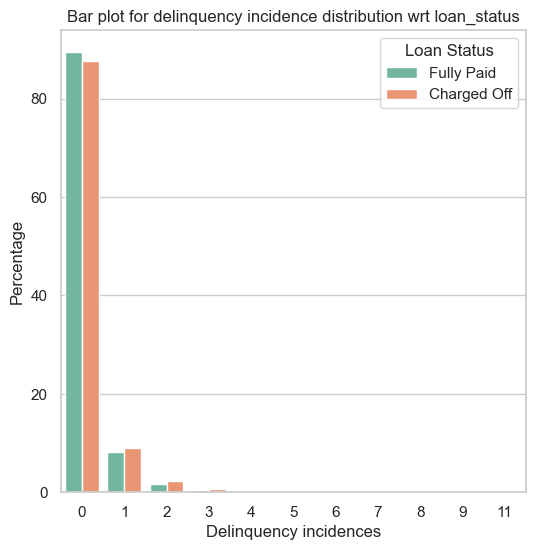

In [46]:
sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))

sns.barplot(x='delinq_2yrs', y='value', hue='variable', data=delinq_2yrs_df, palette='Set2')

plt.xlabel('Delinquency incidences')
plt.ylabel('Percentage')
plt.title('Bar plot for delinquency incidence distribution wrt loan_status')
plt.legend(title='Loan Status', loc='upper right')

plt.show()

##### Impact of delinq_2yrs
 - The number of delinquency incidences are higher for the consumers who are defaulters wrt the ones who have Fully Paid the loan amount.  

Hence, we can conclude that, **higher delinq_2yrs value indicates higher chances of defaulting**.

#### Analysis of dti on loan_status

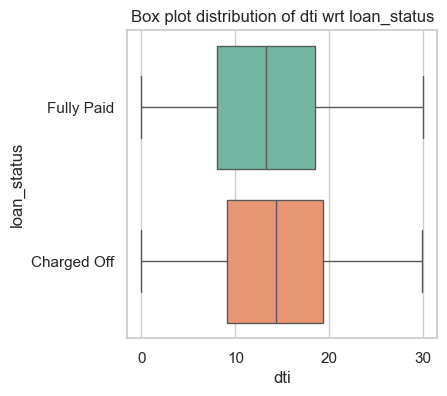

In [47]:
plt.figure(figsize = (4,4))
sns.boxplot(x = 'dti', y = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Box plot distribution of dti wrt loan_status")
plt.show()

##### Impact of dti
The 25th percentile, median, 75th percentile all are higher for the case of consumers who are defaulters wrt the ones who have Fully Paid the loan amount.  

Hence, we can conclude that, **higher dti indicates higher chances of defaulting**.

#### Analysis of inq_last_6mths on loan_status

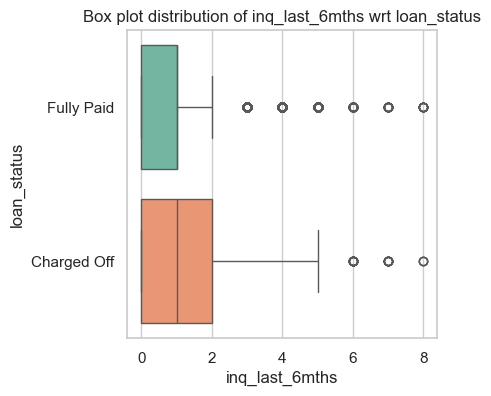

In [48]:
plt.figure(figsize = (4,4))
sns.boxplot(x = 'inq_last_6mths', y = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Box plot distribution of inq_last_6mths wrt loan_status")
plt.show()

In [49]:
#distribution values for Fully Paid consumers on inq_last_6mths
loan_df.loc[loan_df['loan_status'] == 'Fully Paid','inq_last_6mths'].describe()

count    32607.000000
mean         0.836661
std          1.050379
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

In [50]:
#distribution values for Charged Off consumers on inq_last_6mths
loan_df.loc[loan_df['loan_status'] == 'Charged Off','inq_last_6mths'].describe()

count    5584.000000
mean        1.058918
std         1.154050
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: inq_last_6mths, dtype: float64

##### Impact of inq_last_6mths
 - The median for both cases is same whether or not the consumer has defaulted on the loan.
 - The interquartile range for the consumers which had done more inquiries in the last 6 months is higher in the case of defaulters.  
 - There are some outliers in both the cases whether or not the consumer has defaulted on the loan.

Hence, we can conclude that, **higher inq_last_6mths *"slightly"* indicates indicates higher chances of defaulting**.

#### Analysis of open_acc on loan_status

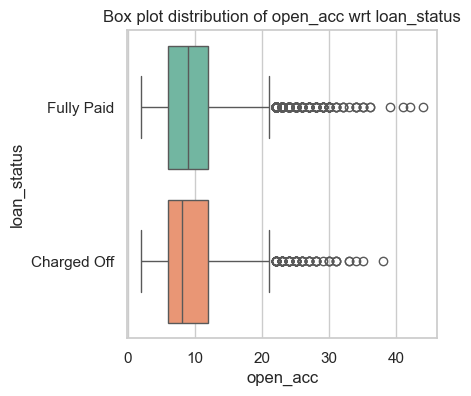

In [51]:
plt.figure(figsize = (4,4))
sns.boxplot(x = 'open_acc', y = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Box plot distribution of open_acc wrt loan_status")
plt.show()

##### Impact of open_acc
 - The interquartile range for both cases is same whether or not the consumer has defaulted on the loan.
 - The median for the consumers having open accounts is lesser in the case of defaulters.  
 - There are many outliers in both the cases whether or not the consumer has defaulted on the loan.

Hence, we can conclude that, **lesser open_acc *"slightly"* indicates indicates higher chances of defaulting**.

#### Analysis of total_acc on loan_status

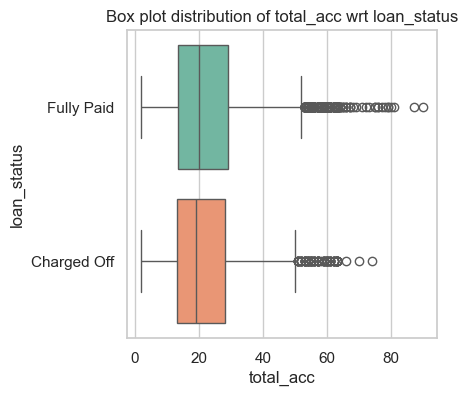

In [52]:
plt.figure(figsize = (4,4))
sns.boxplot(x = 'total_acc', y = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Box plot distribution of total_acc wrt loan_status")
plt.show()

##### Impact of total_acc
 - The interquartile range and median for both cases is roughly same whether or not the consumer has defaulted on the loan.
 - There are many outliers in both the cases whether or not the consumer has defaulted on the loan.

Hence, we can conclude that, **open_acc does not have much impact on the possibility of defaulting consumers**.

#### Analysis of pub_rec_bankruptcies on loan_status

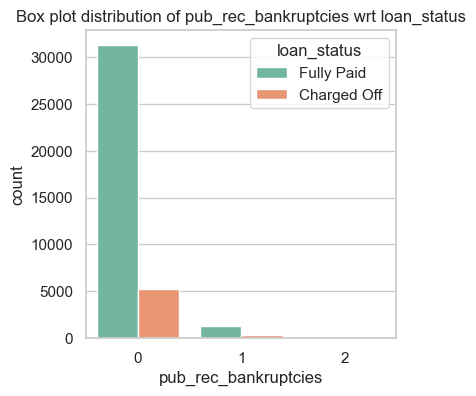

In [53]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'pub_rec_bankruptcies', hue = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Box plot distribution of pub_rec_bankruptcies wrt loan_status")
plt.show()

In [54]:
loan_df.loc[loan_df[evaluation_var] == 'Fully Paid','pub_rec_bankruptcies'].value_counts(normalize = True)*100

pub_rec_bankruptcies
0    96.102064
1     3.888736
2     0.009200
Name: proportion, dtype: float64

In [55]:
loan_df.loc[loan_df[evaluation_var] == 'Charged Off','pub_rec_bankruptcies'].value_counts(normalize = True)*100

pub_rec_bankruptcies
0    93.427650
1     6.536533
2     0.035817
Name: proportion, dtype: float64

##### Impact of pub_rec_bankruptcies
 - The percentage of consumers not having pub_rec_bankruptcies is higher for both the consumers which have defaulted and which have not defaulted.
 - The percentage of the consumers having 0, 1 and 2 public record bankruptcies is quite similar whether or not the consumers have defaulted.

Hence, we can conclude that, **pub_rec_bankruptcies does not have much impact on the possibility of defaulting consumers**.

#### Analysis of issue_d_month and issue_d_year on loan_status

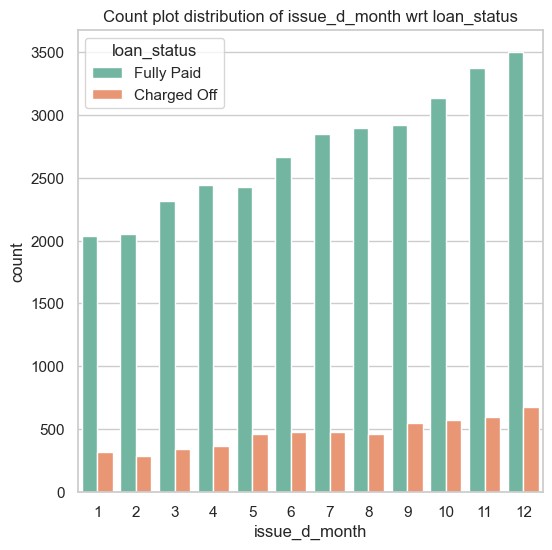

In [56]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'issue_d_month', hue = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Count plot distribution of issue_d_month wrt loan_status")
plt.show()

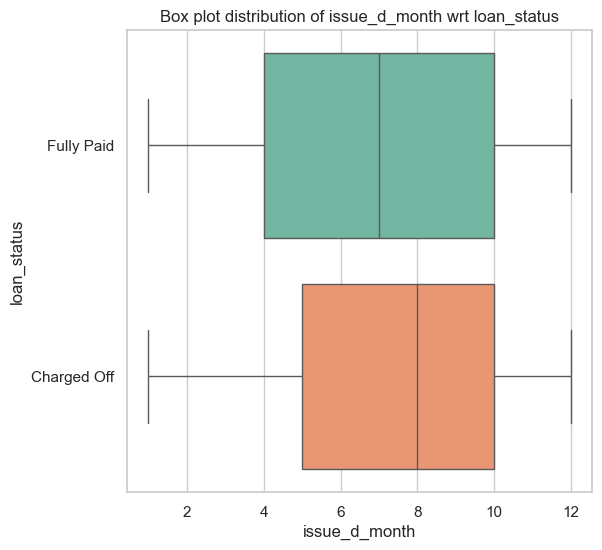

In [57]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'issue_d_month', y = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Box plot distribution of issue_d_month wrt loan_status")
plt.show()

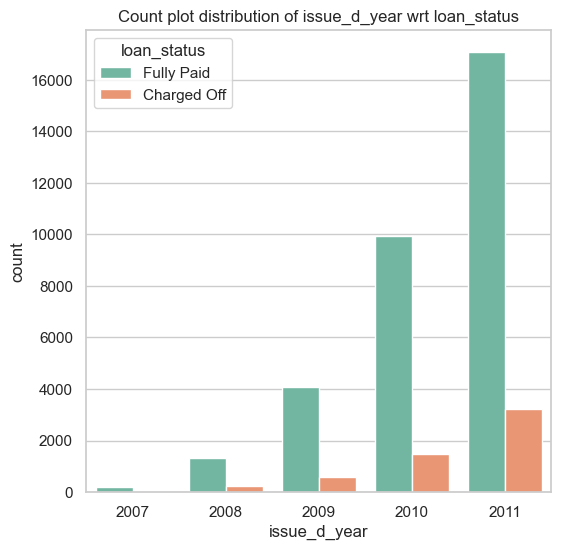

In [58]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'issue_d_year', hue = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Count plot distribution of issue_d_year wrt loan_status")
plt.show()

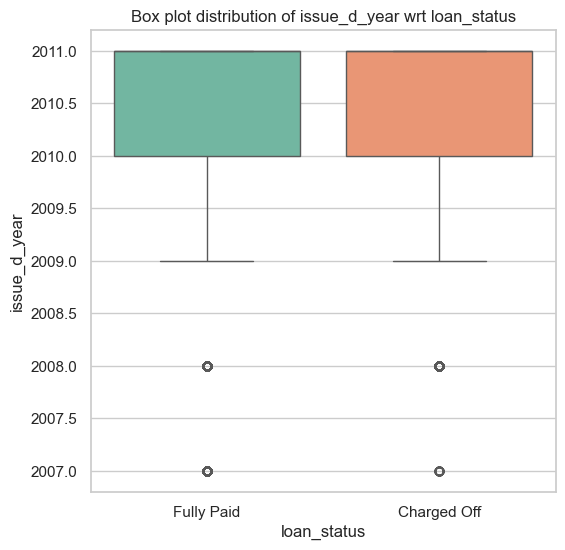

In [59]:
plt.figure(figsize = (6,6))
sns.boxplot(y = 'issue_d_year', x = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Box plot distribution of issue_d_year wrt loan_status")
plt.show()

##### Impact of issue_d_month and issue_d_year

###### General Observations
 - The number of consumers who took the loan is higher in the later months of the year esp December.  
 - The number of consumers who took the loan were higher in the later years esp 2011.  
 - The trend for the number of consumers increases as move from January to December whether or not they defaulted on the loan.
 - The trend for the number of consumers increases as move from 2007 to 2011 whether or not they defaulted on the loan.

###### Specific Observations
 - The consumers who took the loan in the later months of the year are more likely to default based on the distrubution of the issue_d_month.
 - The issue_d_year does not have much impact on the data distribution whether or not the consumer is likely to default.umers have defaulted.

Hence, we can conclude that:
 - **higher issue_d_month indicates higher chances of defaulting**  
 - **issue_d_year does not have much impact on the possibility of defaulting consumers**

#### Analysis of earliest_cr_line_month and earliest_cr_line_year on loan_status

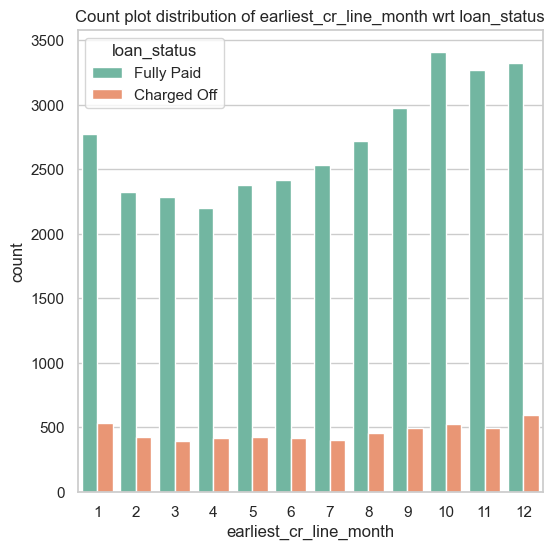

In [60]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'earliest_cr_line_month', hue = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Count plot distribution of earliest_cr_line_month wrt loan_status")
plt.show()

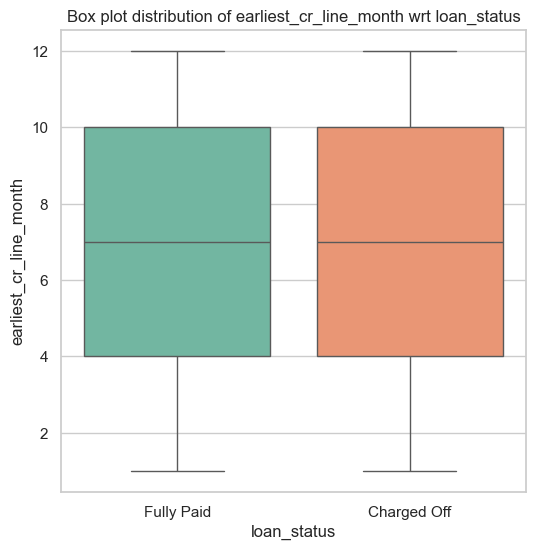

In [61]:
plt.figure(figsize = (6,6))
sns.boxplot(y = 'earliest_cr_line_month', x = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Box plot distribution of earliest_cr_line_month wrt loan_status")
plt.show()

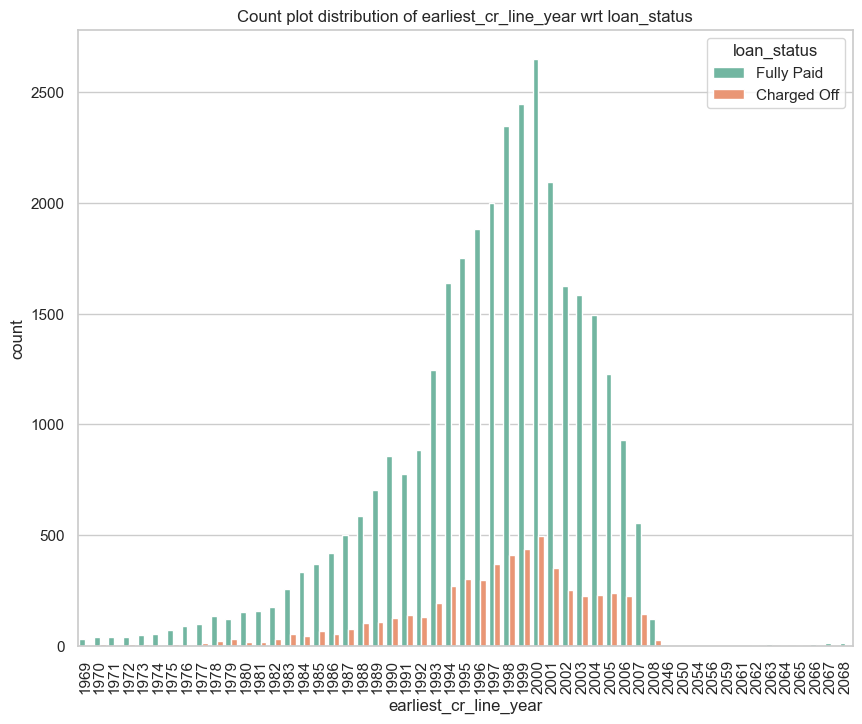

In [62]:
plt.figure(figsize = (10,8))
plt.xticks(rotation = 90)
sns.countplot(x = 'earliest_cr_line_year', hue = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Count plot distribution of earliest_cr_line_year wrt loan_status")
plt.show()

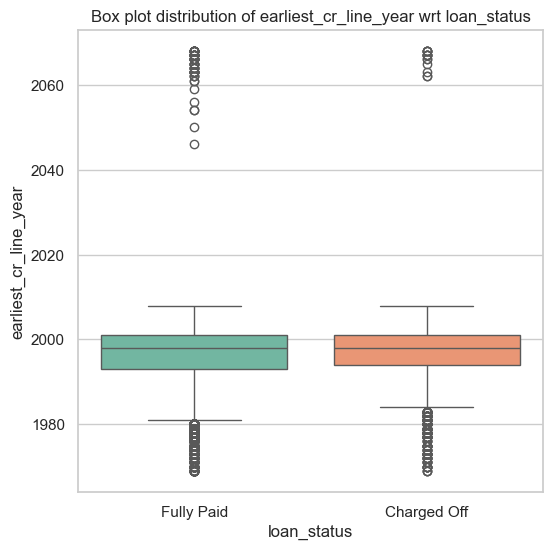

In [63]:
plt.figure(figsize = (6,6))
sns.boxplot(y = 'earliest_cr_line_year', x = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Box plot distribution of earliest_cr_line_year wrt loan_status")
plt.show()

##### Impact of earliest_cr_line_month and earliest_cr_line_year
 - The value of earliest_cr_line_month does not follow a particular trend and distribution whether or not the consumers have defaulted on the loan.  
 - The value of earliest_cr_line_year does not follow a particular trend and distribution whether or not the consumers have defaulted on the loan.  

Hence, we can conclude that both **earliest_cr_line_month and earliest_cr_line_year do not have much impact on the possibility of defaulting consumers**.

### Analyzing the imapct of the categorical variables on loan_status

#### Analysis of term on loan_status

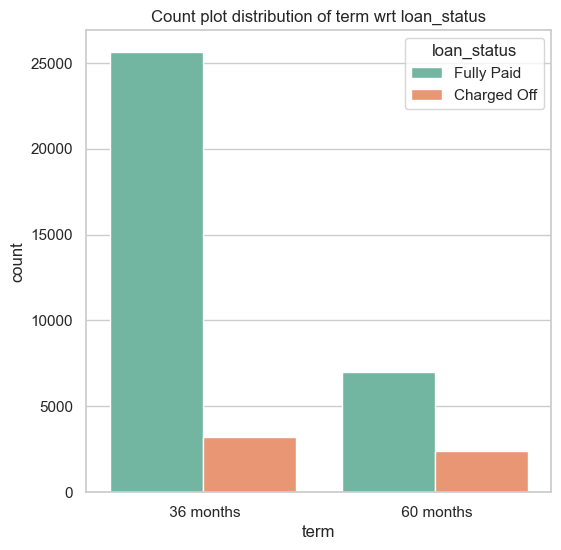

In [64]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'term', hue = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Count plot distribution of term wrt loan_status")
plt.show()

In [65]:
#generating the bar plot percentage distribution for term
term_df = generate_bar_plot_distribution_for_loan_status(loan_df, feature_variable = 'term')

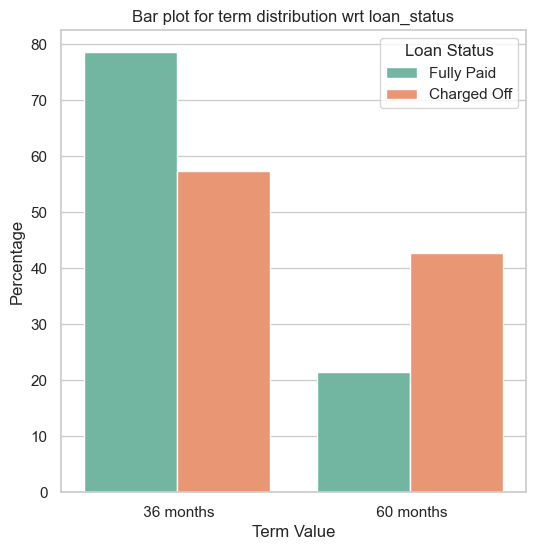

In [66]:
sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))

sns.barplot(x='term', y='value', hue='variable', data=term_df, palette='Set2')

plt.xlabel('Term Value')
plt.ylabel('Percentage')
plt.title('Bar plot for term distribution wrt loan_status')
plt.legend(title='Loan Status', loc='upper right')

plt.show()

##### Impact of term
 - More number of consumers have opted for 36 months term duration irrespective of their subsequent loan_status.
 - The consumers who have opted for lower term duration i.e. 36 months are likely to pay off the loan.
 - The consumers who have opted for higher term duration i.e. 60 months are likely to default on the loan repayment.

Hence, we can conclude that **higher term duration indicates the possibility of defaulting consumers**.

#### Analysis of grade on loan_status

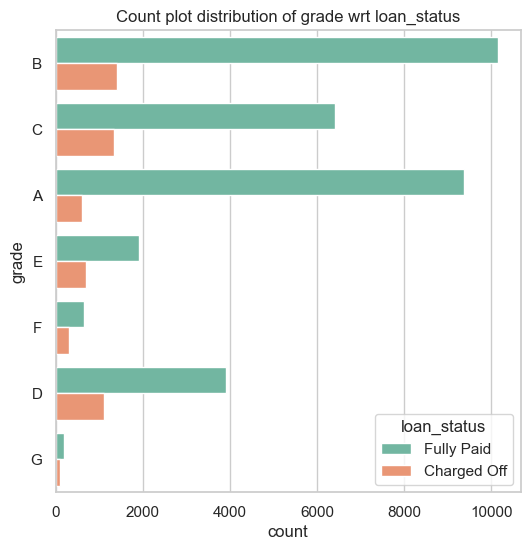

In [67]:
plt.figure(figsize = (6,6))
sns.countplot(y = 'grade', hue = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Count plot distribution of grade wrt loan_status")
plt.show()

In [68]:
#generating the bar plot percentage distribution for grade
grade_df = generate_bar_plot_distribution_for_loan_status(loan_df, feature_variable = 'grade')
grade_df = grade_df.sort_values(by = ['grade','variable'], ascending = [True, False])
grade_df

,grade,variable,value
1,A,Fully Paid,28.754562
8,A,Charged Off,10.762894
0,B,Fully Paid,31.180421
7,B,Charged Off,25.322350
2,C,Fully Paid,19.661422
9,C,Charged Off,24.032951
3,D,Fully Paid,12.006624
10,D,Charged Off,19.914040
4,E,Fully Paid,5.845371
11,E,Charged Off,12.607450


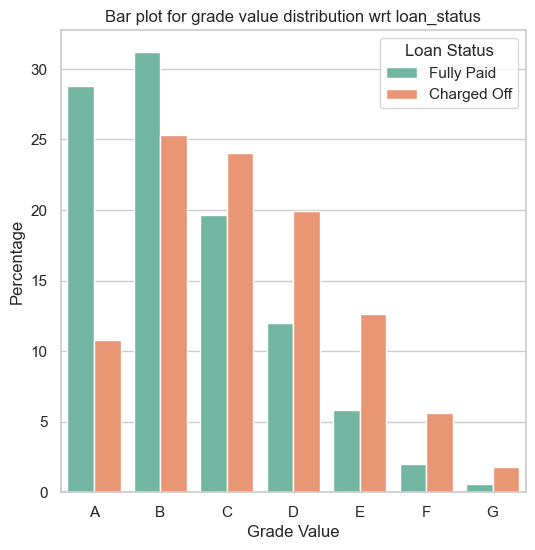

In [69]:
sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))

sns.barplot(x='grade', y='value', hue='variable', data=grade_df, palette='Set2')

plt.xlabel('Grade Value')
plt.ylabel('Percentage')
plt.title('Bar plot for grade value distribution wrt loan_status')
plt.legend(title='Loan Status', loc='upper right')

plt.show()

##### Impact of grade
 - More number of consumers have grade B irrespective of their subsequent loan_status.
 - The consumers who have grade B, C, D etc are more likely to default than the other grade values.
 - The possibility for consumers having grade E, F and G also make them more likely to default.
 - The consumers with grade A are more likely to Fully Pay the loan amount.

Hence, we can conclude that **lower grade value indicates the possibility of defaulting consumers**.

#### Analysis of sub_grade on loan_status

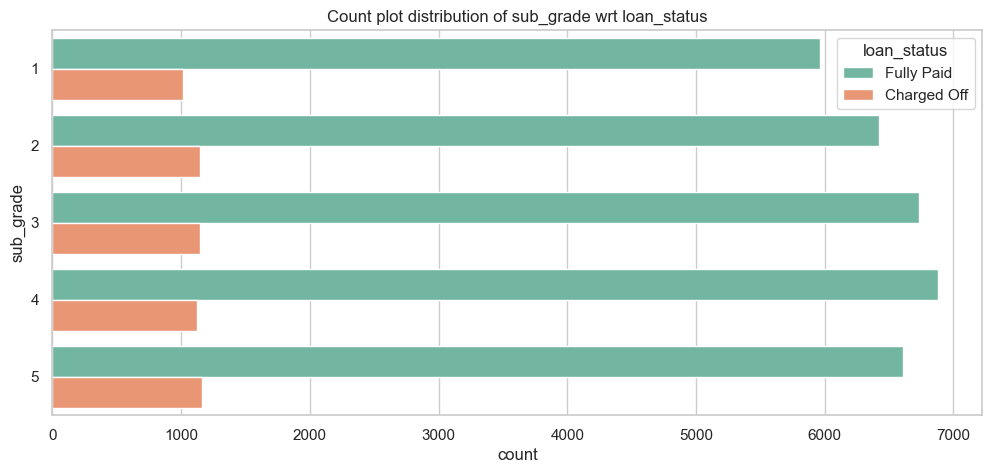

In [70]:
plt.figure(figsize = (12,5))
sns.countplot(y = 'sub_grade', hue = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Count plot distribution of sub_grade wrt loan_status")

plt.show()

In [71]:
#generating the bar plot percentage distribution for sub_grade
sub_grade_df = generate_bar_plot_distribution_for_loan_status(loan_df, feature_variable = 'sub_grade')
sub_grade_df = sub_grade_df.sort_values(by = ['sub_grade','variable'], ascending = [True, False])
sub_grade_df

,sub_grade,variable,value
4,1,Fully Paid,18.284417
9,1,Charged Off,18.159026
3,2,Fully Paid,19.701291
8,2,Charged Off,20.505014
1,3,Fully Paid,20.652007
6,3,Charged Off,20.522923
0,4,Fully Paid,21.102831
5,4,Charged Off,20.075215
2,5,Fully Paid,20.259453
7,5,Charged Off,20.737822


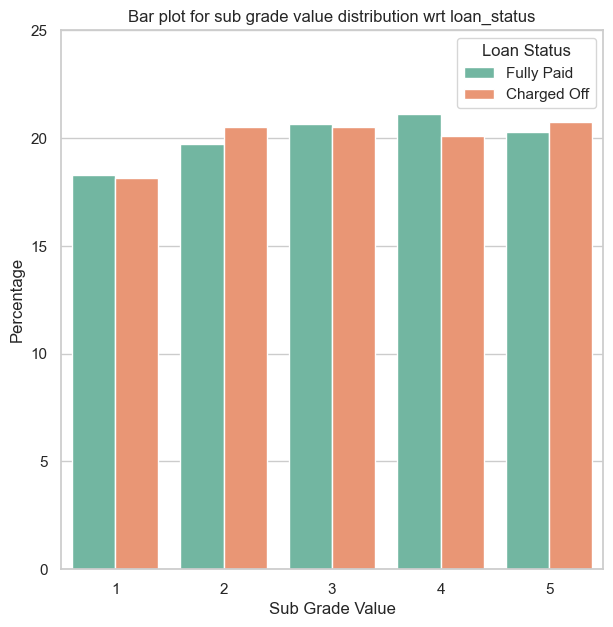

In [72]:
sns.set(style='whitegrid')
plt.figure(figsize=(7, 7))

sns.barplot(x='sub_grade', y='value', hue='variable', data=sub_grade_df, palette='Set2')

plt.xlabel('Sub Grade Value')
plt.ylabel('Percentage')
plt.title('Bar plot for sub grade value distribution wrt loan_status')
plt.ylim(0, 25)
plt.legend(title='Loan Status', loc='upper right')

plt.show()

##### Impact of sub_grade
The distribution of consumers wrt sub_grade is quite similar irrespective of whether they have or have not defaulted on the loan.

Hence, we can conclude that **sub_grade value does not have much impact on the possibility of defaulting consumers**.

#### Analysis of emp_length on loan_status

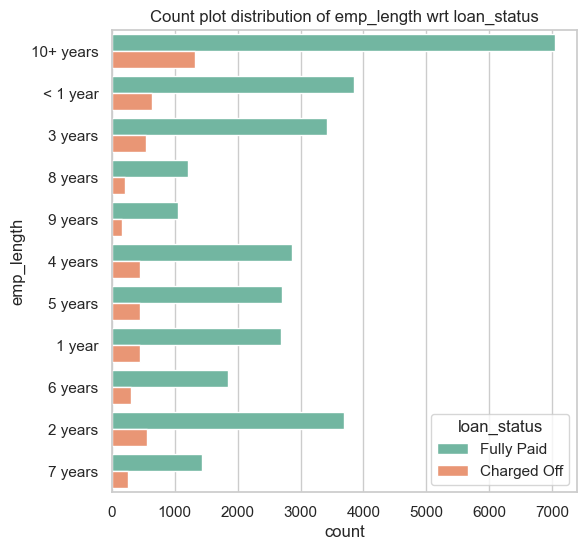

In [73]:
plt.figure(figsize = (6,6))
sns.countplot(y = 'emp_length', hue = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Count plot distribution of emp_length wrt loan_status")
plt.show()

In [74]:
#generating the bar plot percentage distribution for emp_length
emp_length_df = generate_bar_plot_distribution_for_loan_status(loan_df, feature_variable = 'emp_length')

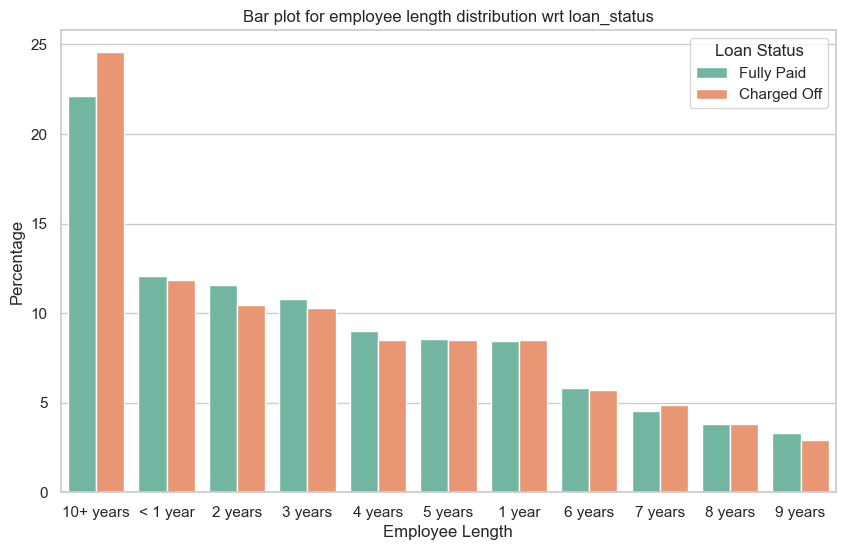

In [75]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.barplot(x='emp_length', y='value', hue='variable', data=emp_length_df, palette='Set2')

plt.xlabel('Employee Length')
plt.ylabel('Percentage')
plt.title('Bar plot for employee length distribution wrt loan_status')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

##### Impact of emp_length
 - Most consumers who opt for loan are having 10+ years of employee experience irrespective of their loan_status.  
 - The distribution of consumers wrt to the employee length is similar whether or not they have been a defaulter in paying off the loan

Hence, we can conclude that **emp_length value does not have much impact on the possibility of defaulting consumers**.

#### Analysis of home_ownership on loan_status

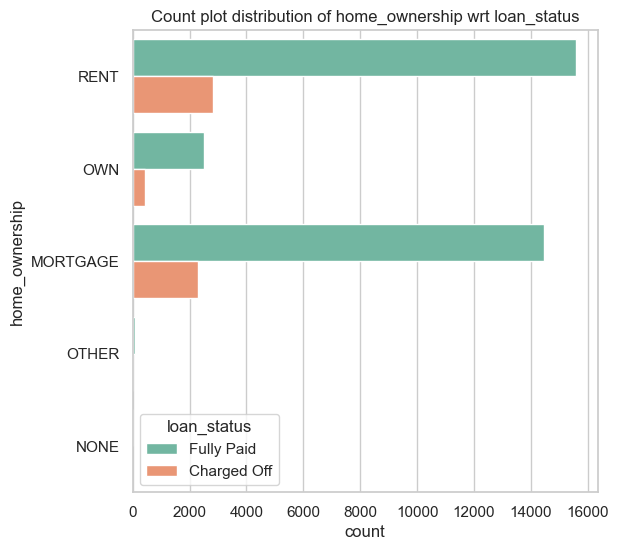

In [76]:
plt.figure(figsize = (6,6))
sns.countplot(y = 'home_ownership', hue = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Count plot distribution of home_ownership wrt loan_status")
plt.show()

In [77]:
#generating the bar plot percentage distribution for home_ownership
home_ownership_df = generate_bar_plot_distribution_for_loan_status(loan_df, feature_variable = 'home_ownership')

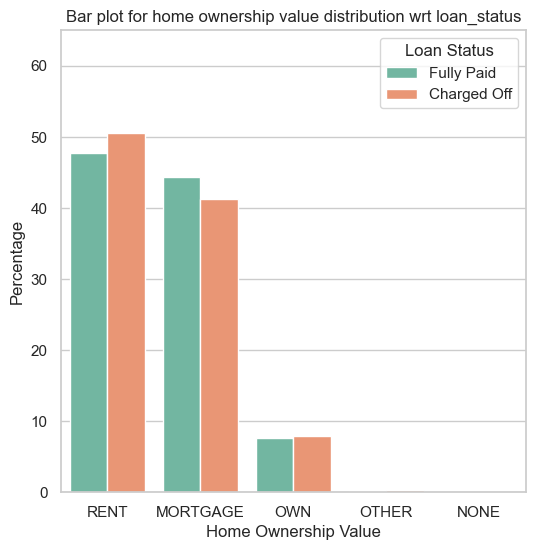

In [78]:
sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))

sns.barplot(x='home_ownership', y='value', hue='variable', data=home_ownership_df, palette='Set2')

plt.xlabel('Home Ownership Value')
plt.ylabel('Percentage')
plt.title('Bar plot for home ownership value distribution wrt loan_status')
plt.legend(title='Loan Status', loc='upper right')
plt.ylim(0,65)
plt.show()

##### Impact of home_ownership
 - Most consumers who opt for loan are staying on RENT irrespective of their loan_status.  
 - The consumers who are staying on RENT have a slightly higher chance of defaulting on the loan.

Hence, we can conclude that **home_ownership value RENT has some impact on the possibility of defaulting consumers**.

#### Analysis of verification_status on loan_status

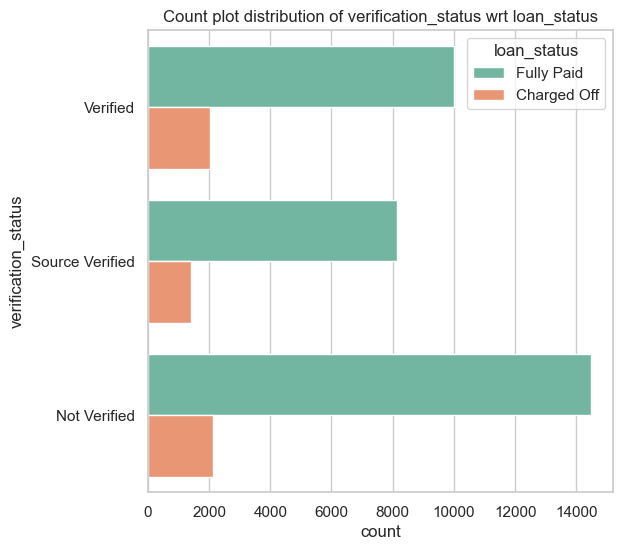

In [79]:
plt.figure(figsize = (6,6))
sns.countplot(y = 'verification_status', hue = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Count plot distribution of verification_status wrt loan_status")
plt.show()

In [80]:
#generating the bar plot percentage distribution for verification_status
ver_status_df = generate_bar_plot_distribution_for_loan_status(loan_df, feature_variable = 'verification_status')

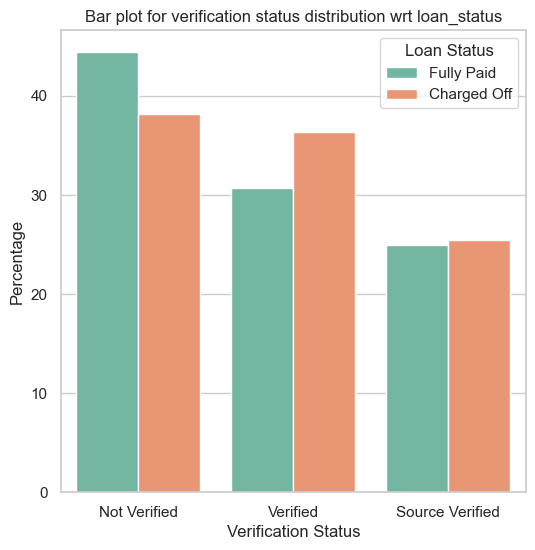

In [81]:
sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))

sns.barplot(x='verification_status', y='value', hue='variable', data=ver_status_df, palette='Set2')

plt.xlabel('Verification Status')
plt.ylabel('Percentage')
plt.title('Bar plot for verification status distribution wrt loan_status')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

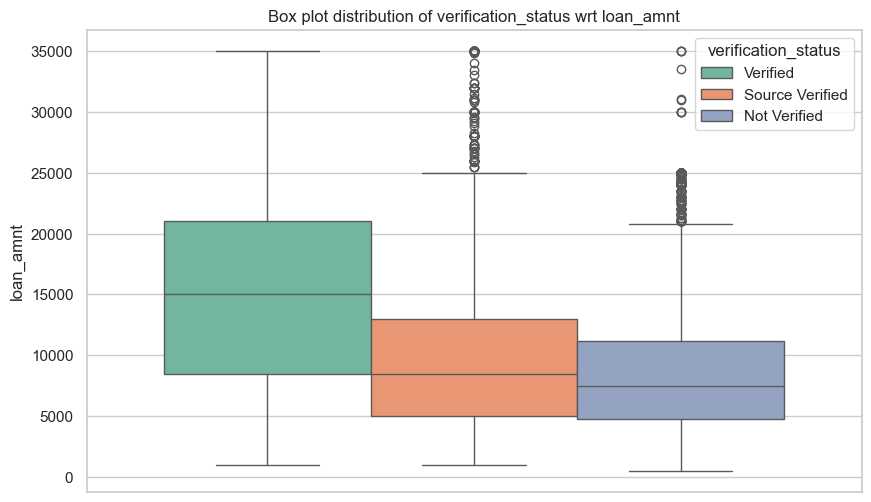

In [82]:
#identifying relationship of verification_status wrt loan_amnt
plt.figure(figsize = (10,6))
sns.boxplot(y = 'loan_amnt', hue = 'verification_status', data = loan_df, palette = 'Set2')
plt.title(f"Box plot distribution of verification_status wrt loan_amnt")
plt.show()

##### Impact of verification_status
 - There is a higher proportion of the consumers whose status is not verified by the company irrespective of their loan_status.  
 - When the consumer status is Verified/Source Verified there are higher chances of the consumer defaulting on the loan.
 - This is not a helpful indicator for analyzing loan_status since even after verification, there are customers who are defaulting.  
 - The plot on loan_amnt v/s verification_status clearly indicates that the company prioritizes Verification/Source Verification of consumers who have applied for higher amounts of loan.

Hence, we can conclude that **verification_status is not a useful indicator on the possibility of defaulting consumers**.  
However, **verification_status is highly related to the loan_amnt** value.

#### Analysis of purpose on loan_status

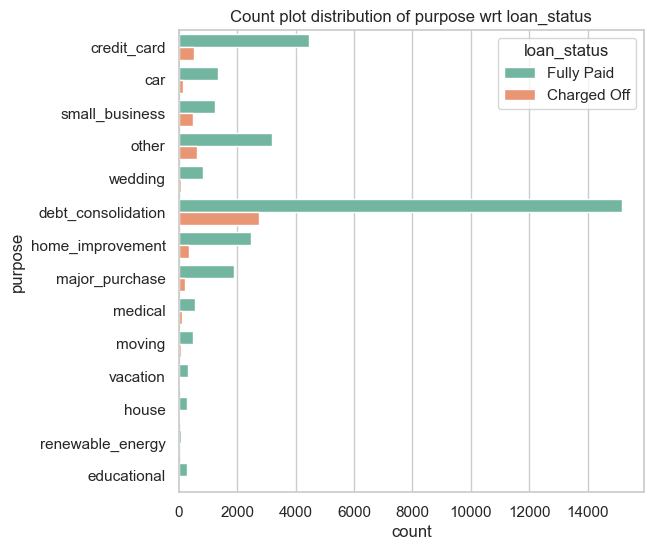

In [83]:
plt.figure(figsize = (6,6))
sns.countplot(y = 'purpose', hue = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Count plot distribution of purpose wrt loan_status")
plt.show()

In [84]:
#generating the bar plot percentage distribution for purpose
purpose_df = generate_bar_plot_distribution_for_loan_status(loan_df, feature_variable = 'purpose')

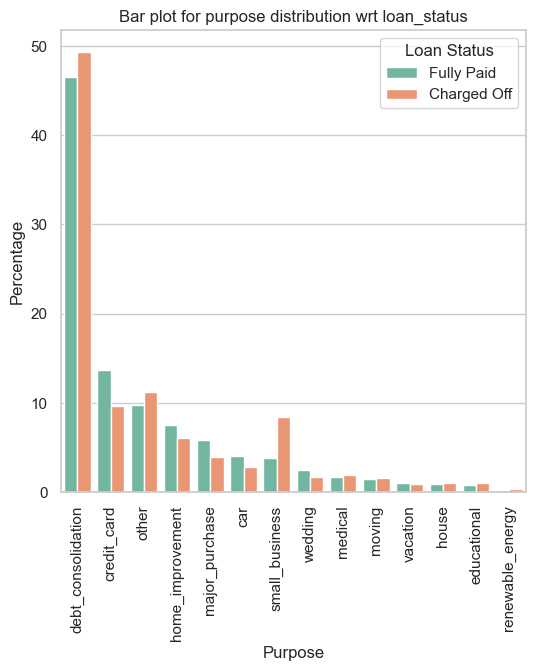

In [85]:
sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))

sns.barplot(x='purpose', y='value', hue='variable', data=purpose_df, palette='Set2')

plt.xlabel('Purpose')
plt.ylabel('Percentage')
plt.title('Bar plot for purpose distribution wrt loan_status')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=90)
plt.show()

##### Impact of purpose
 - Most consumers who opt for loan are doing it for debt consolidation irrespective of their loan_status.  
 - The consumers opting for loan for the purpose of debt consolidation have a slightly higher chance of defaulting.

Hence, we can conclude that **purpose of loan being debt_consolidation slightly increases the possibility of defaulting consumers**.

#### Analysis of addr_state on loan_status

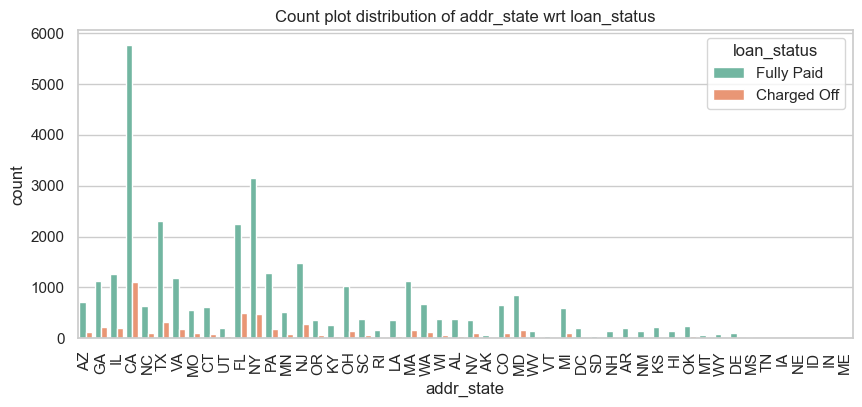

In [86]:
plt.figure(figsize = (10,4))
plt.xticks(rotation = 90)
sns.countplot(x = 'addr_state', hue = evaluation_var, data = loan_df, palette = 'Set2')
plt.title(f"Count plot distribution of addr_state wrt loan_status")
plt.show()

In [87]:
#generating the bar plot percentage distribution for addr_state
addr_state_df = generate_bar_plot_distribution_for_loan_status(loan_df, feature_variable = 'addr_state')

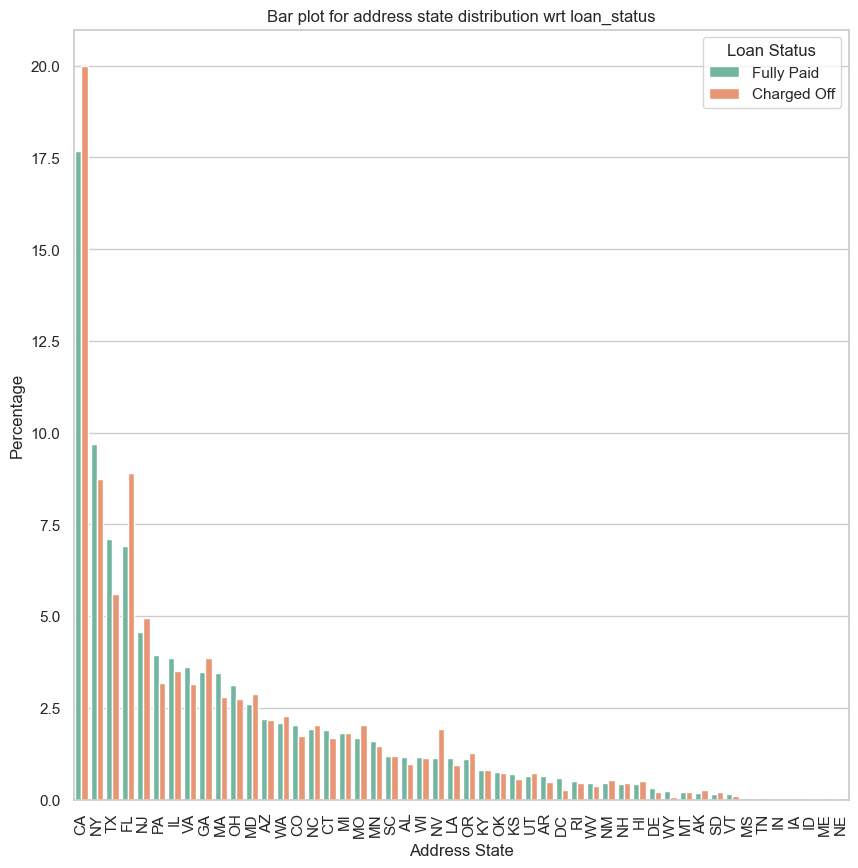

In [88]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 10))

sns.barplot(x='addr_state', y='value', hue='variable', data=addr_state_df, palette='Set2')

plt.xlabel('Address State')
plt.ylabel('Percentage')
plt.title('Bar plot for address state distribution wrt loan_status')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=90)
plt.show()

##### Impact of addr_state
 - Most consumers who opt for loan are from CA addr_state irrespective of their loan_status.  
 - The consumers who have addr_state as "CA", "FL" have slightly higher chance of defaulting on the loan repayment.

Hence, we can conclude that **addr_state being _"CA"_, _"FL"_ have slight impact on the possibility of defaulting consumers**.

### Multivariate Analysis

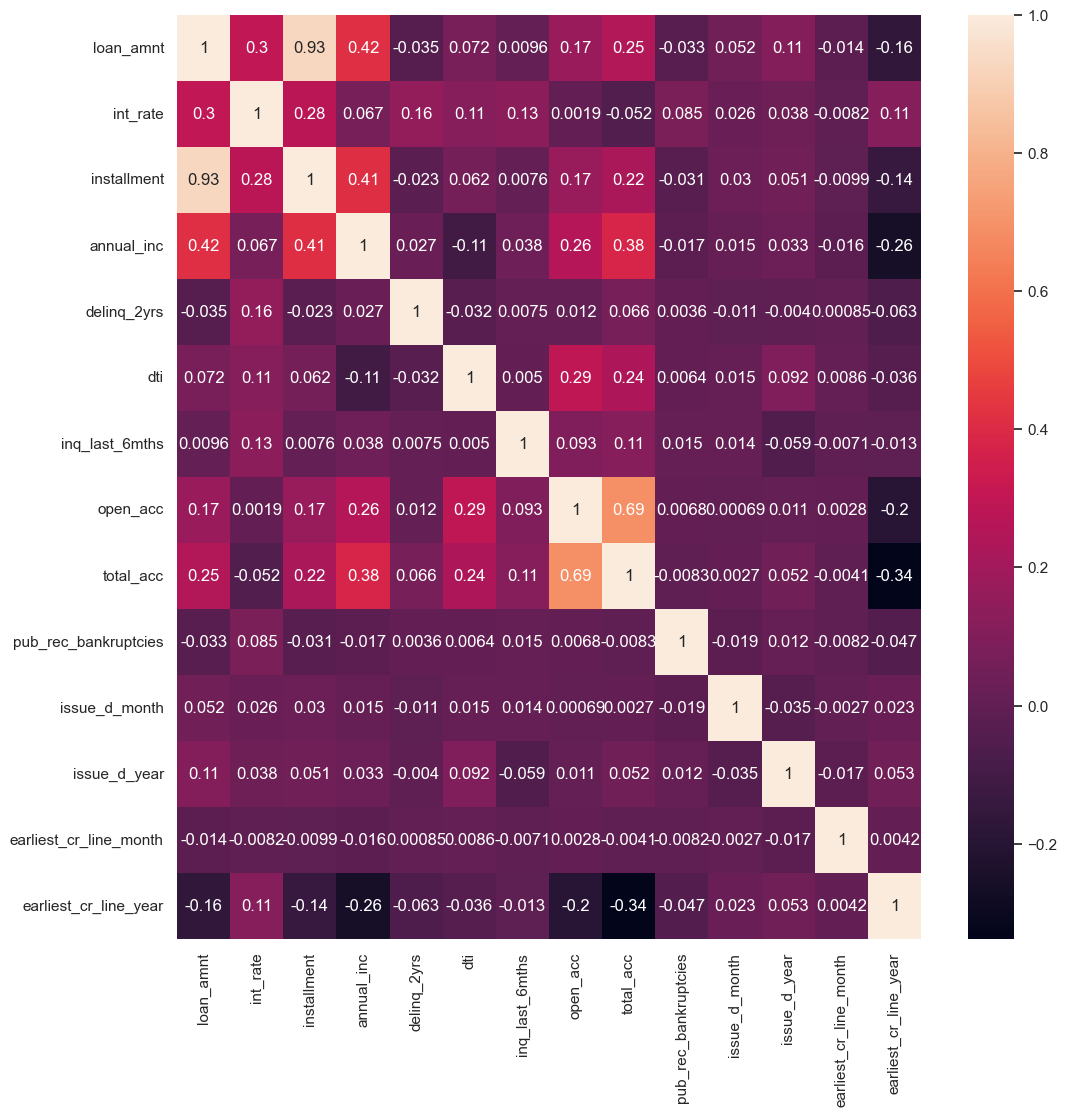

In [89]:
# using heatmap to identify the correlation between numerical variables
plt.figure(figsize=(12,12))
sns.heatmap(loan_df[numerical_vars].corr(),annot=True)
plt.show()

##### Impact of correlation between numerical variables

Since our problem statement revolves around the behavior and impact of different variables on loan_status, insights from the correlation heatmap above are **"useful yet not relevant"** to our case study problem statement.

_Useful insight from the heatmap: loan_amnt and installment are highly positively correlated. This is obvious since higher the loan amount, more the number of installments required to repay the loan._

Hence, we can conclude that **correlation between numerical variables alone is not relevant for our case study**.

### Conclusion

#### Driving factors that can help in the identification of risky loan applicants (consumers which are likely to default)
 - **int_rate**: Higher interest rate implies higher probability of loan default
 - **annual_inc**: Lower annual income implies higher probability of loan default
 - **delinq_2yrs**: Higher number of delinquency incidences for the past 2 years implies higher probability of loan default
 - **dti**: Higher dti ratio implies higher probability of loan default
 - **issue_d_month**: Higher issue_d_month (loan applications which have issue date in the latter months of the year especially December) implies higher probability of loan default
 - **term**: Higher term duration (60 months) implies higher probability of loan default
 - **grade**: Lower grade value (B, C, D etc) implies higher probability of loan default

#### Additional factors affecting loan default
 - **loan_amnt**: Higher loan amount slightly increases the probability of loan default
 - **inq_last_6mths**: Higher number of inquiries made in the last 6 months slightly increases the probability of loan default
 - **open_acc**: Lower number of open accounts slightly increases the probability of loan default
 - **home_ownership**: Home ownership value "RENT" slightly increases the probability of loan default
 - **purpose**: Purpose of availing loan being "debt_consolidation" slightly increases the probability of loan default
 - **address_state**: Loan applicant's address state being "CA", "FL" slightly increases the probability of loan default